# Setup
First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=16,12

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Linear regression using the Normal Equation

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


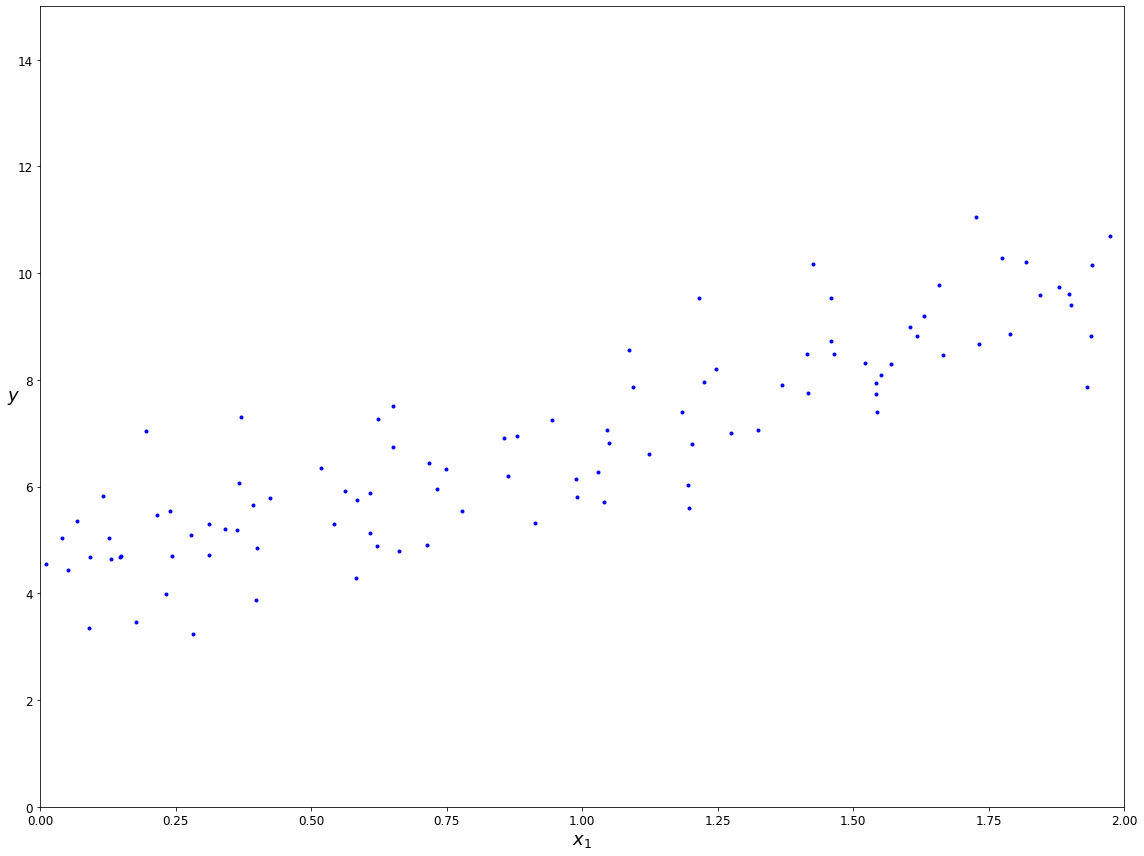

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

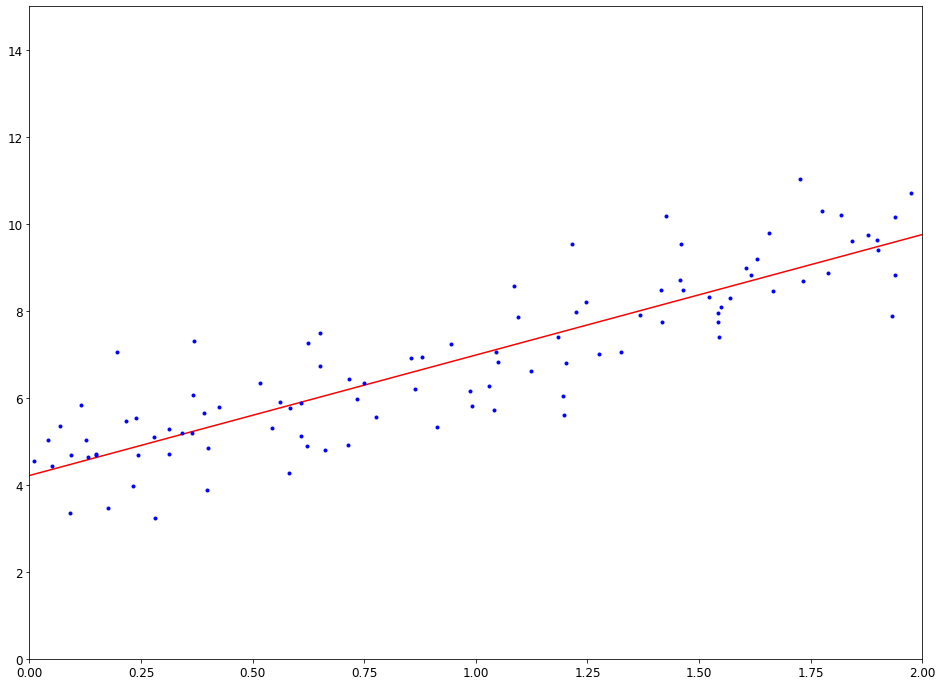

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

adding labels and legend to the plot

Saving figure linear_model_predictions_plot


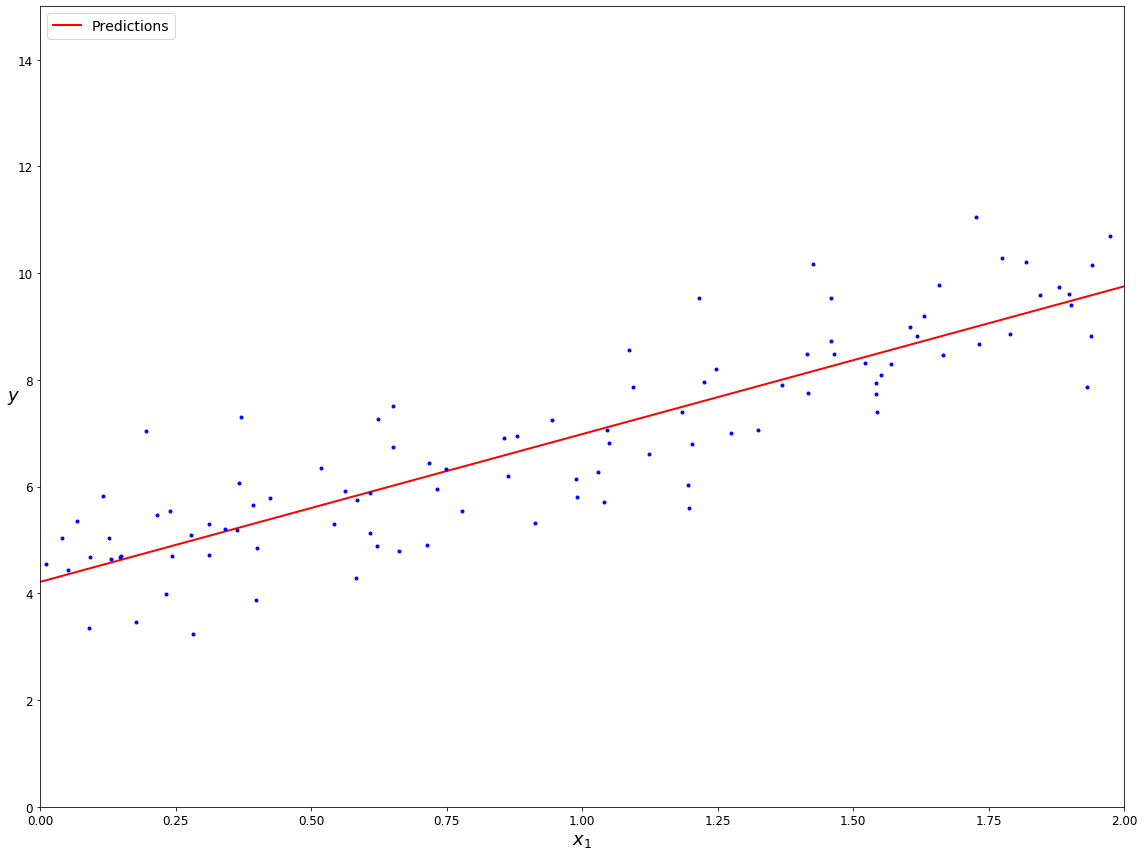

In [8]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

# sklearn models

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])


The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for "least squares"), which you could call directly:

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

 
This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the pseudoinverse of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly:

# Linear regression using batch gradient descent

# a
[6 Marks]
Write a simple implementation of a least-squares solution to linear regression that applies an iterative update to adjust the weights. Demonstrate the success of your approach on the sample data loaded below, and visualize the best fit plotted as a line (consider using linspace) against a scatter plot of the x and y test values

In [12]:
##### YOUR CODE HERE #######
step_list = [100, 500, 1000, 4000]
theta_lists = []
cost_lists = []
alpha = 0.01
theta = np.zeros((2,1))
m = len(y)
X_b = np.c_[np.ones((100, 1)), X]

# Creating the cost function J(Theta) square error
def Costfunc(X, y, theta):
    Jtheta = np.sum((X.dot(theta)-y)**2)/(2*m)
    return Jtheta

# Updating the cost function J(Theta) and Theta value to find the minimum loss ie minimizing the Cost function by
# adjusting the weights

def GradDesc(X, y, theta, alpha, steps):
    cost_history = [0] * steps

    for step in range(steps):
        hypothesis = X.dot(theta)
        loss = hypothesis-y
        grad = (X.T.dot(loss))/m
        theta = theta - alpha*grad
        cost = Costfunc(X, y, theta)
        cost_history[step] = cost
    return theta, cost_history

for i in step_list:
    cf = Costfunc(X_b, y, theta)
    (THETA, COST) = GradDesc(X_b, y, theta, alpha, i)
    theta_lists.append(THETA)
    cost_lists.append(COST)
    
print("theta: ", theta_lists)

theta:  [array([[2.97649668],
       [3.05807904]]), array([[3.78976791],
       [3.14546401]]), array([[4.03321421],
       [2.93070525]]), array([[4.21398247],
       [2.77109671]])]


Saving figure linear_model_predictions_plot_with_batch_gradient_descent


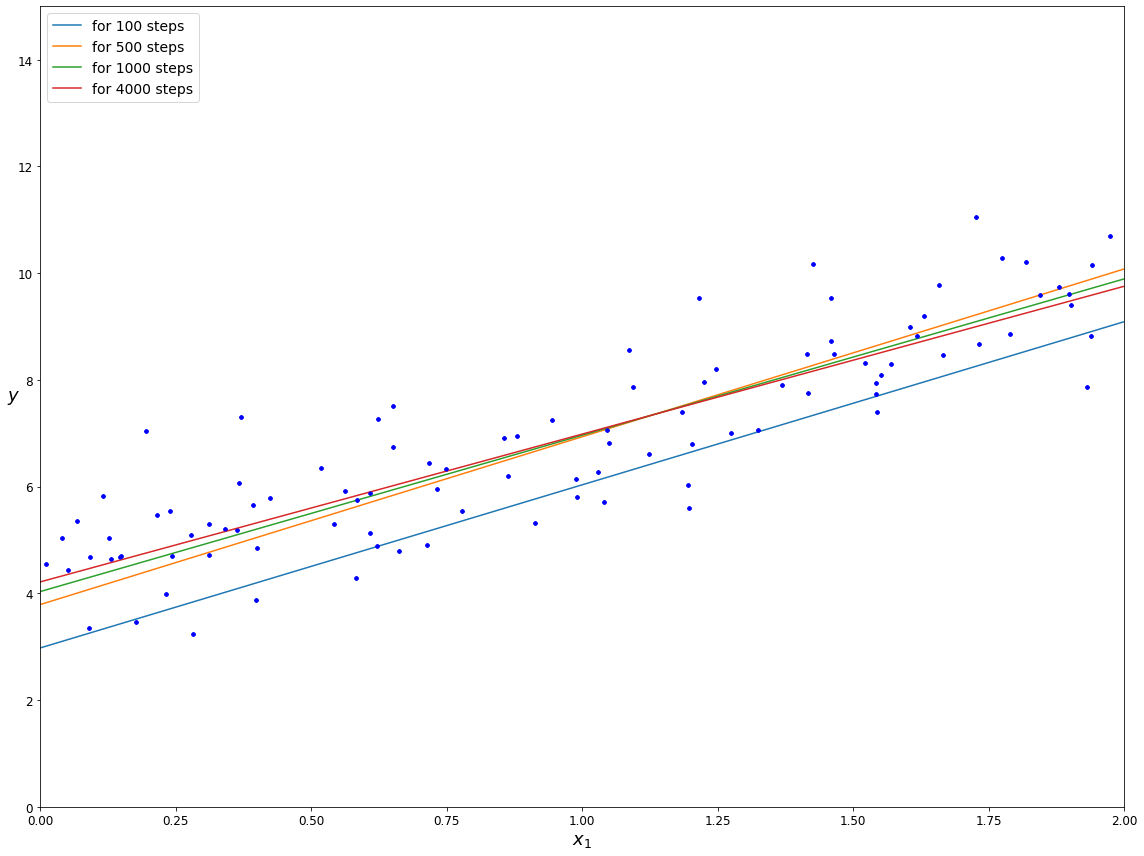

In [13]:
# Plotting the hypothesis function
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict_list = []
k = 0

for theta_element in theta_lists:
    y_predict = X_new_b.dot(theta_element)
    y_predict
    y_predict_list.append(y_predict)
    
    
    
for y_predict_in in y_predict_list:
    plt.plot(X_new, y_predict_in, label = ("for " + str(step_list[k]) + " steps"))
    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.legend(loc="upper left", fontsize=14)
    plt.axis([0, 2, 0, 15])
    k = k + 1

save_fig("linear_model_predictions_plot_with_batch_gradient_descent")
plt.show()

# b
[6 Marks]
Load data on movie ratings, revenue, metadata etc. Split data into a relevant set for training, testing and classification. Explain your choice of split. It is ok if you decide to split into these subsets after part c -> if you do so, mention this at the end of your explanation.
Explanation:

In [14]:
### An example to load a csv file
import pandas as pd 
import numpy as np
from ast import literal_eval
meta_data=pd.read_csv('movies_metadata.csv', low_memory=False, usecols=["budget", "genres", "id", "original_title", 
            "popularity", "production_companies", "production_countries", "revenue", "vote_average"])
# You may wish to specify types, or process columns once read
ratings_small=pd.read_csv('ratings_small.csv')
import warnings; warnings.simplefilter('ignore')

##### YOUR CODE HERE #######

# c
[6 Marks]

Organize the data into relevant features for predicting revenue. 

i. Explain your feature sets and organization. 
The features that I have considered are budget, genres, popularity, production_companies, production_countries and vote_average.
EXPLANATION:
Budget - movies that are lower or higher in budget do not generate a lot of revenue. But spending an optimum money on making the movie generates more profit. From the graph we can see that movies that spent more that 2.5 million genertated lesser revenue compared to the movies less than 2.5 million and movies with budget less than 1 million tend to make revenue less than movies with budget of 1.5 million.

genre - The revenue generated by comedy and drama was significantly more than the history or animation movie. This maybe also due to the fact that movies with historic significane was not quiet popular are the most frequent genre. We can also conclude that the number of animation or historic movies that released were less in number thus having a lower revenue margin.

popularity - a movie which is more popular tend to generate more revenue.

production_companies - a famous production company or a company with high reputation generated more revenue.

production_country - most of the movies were screened on US thus US population has been contributing higher revenue.

vote average - A movie with a higher vote average had a higher revenue indicating that a larger population have viewed the picture thus contributing to more revenur

ii. Plot movie revenue vs. rating as a scatter plot and discuss your findings. 
EXPLANATION:
The movies that had a rating in the range of 3-4 generated more revenue. Since we might have had a larger population watching the movie and there must have been a mixed rating which indicates the revenue is more than movies with the rating of 4 above. Moreover the movies that fall in this range have a better response from the crowd compared to a movies with lower rating. 

iii. Visualize any other relationships you deem interesting and explain. EXPLANATION
Visualized relations between:
Budget vs Revenue
Genre vs Revenue
Popularity vs Revenue
Produciton Company vs Revenue
Produciton Country vs Revenue
Average vore vs Revenue

In [15]:
meta_data.head(10)
# The following line is one way of cleaning up the genres field - there are more verbose ways of doing this that are easier for a human to read
#meta_data['genres'] = meta_data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
#meta_data['year'] = pd.to_datetime(meta_data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

# Consider how to columns look before and after this 'clean-up' - it is very common to have to massage the data to get the right features
#ratings_small.head() 
##### YOUR CODE HERE #######

meta_data['genres'] = meta_data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
meta_data.head()
meta_data['production_companies'] = meta_data['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
meta_data['production_countries'] = meta_data['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
meta_data = meta_data[(meta_data[['budget', 'revenue']] != 0).all(axis=1)] # removing if both budget and revenue are zero.

meta_data['popularity'].fillna('0', inplace=True)

data_type = meta_data.dtypes
print(data_type)
meta_data.head()


budget                   object
genres                   object
id                       object
original_title           object
popularity               object
production_companies     object
production_countries     object
revenue                 float64
vote_average            float64
dtype: object


,budget,genres,id,original_title,popularity,production_companies,production_countries,revenue,vote_average
0,30000000,"[Animation, Comedy, Family]",862,Toy Story,21.946943,[Pixar Animation Studios],[United States of America],373554033.0,7.7
1,65000000,"[Adventure, Fantasy, Family]",8844,Jumanji,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],262797249.0,6.9
3,16000000,"[Comedy, Drama, Romance]",31357,Waiting to Exhale,3.859495,[Twentieth Century Fox Film Corporation],[United States of America],81452156.0,6.1
4,0,[Comedy],11862,Father of the Bride Part II,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],76578911.0,5.7
5,60000000,"[Action, Crime, Drama, Thriller]",949,Heat,17.924927,"[Regency Enterprises, Forward Pass, Warner Bros.]",[United States of America],187436818.0,7.7


Text(0.5, 1.0, 'Butget vs Revenue')

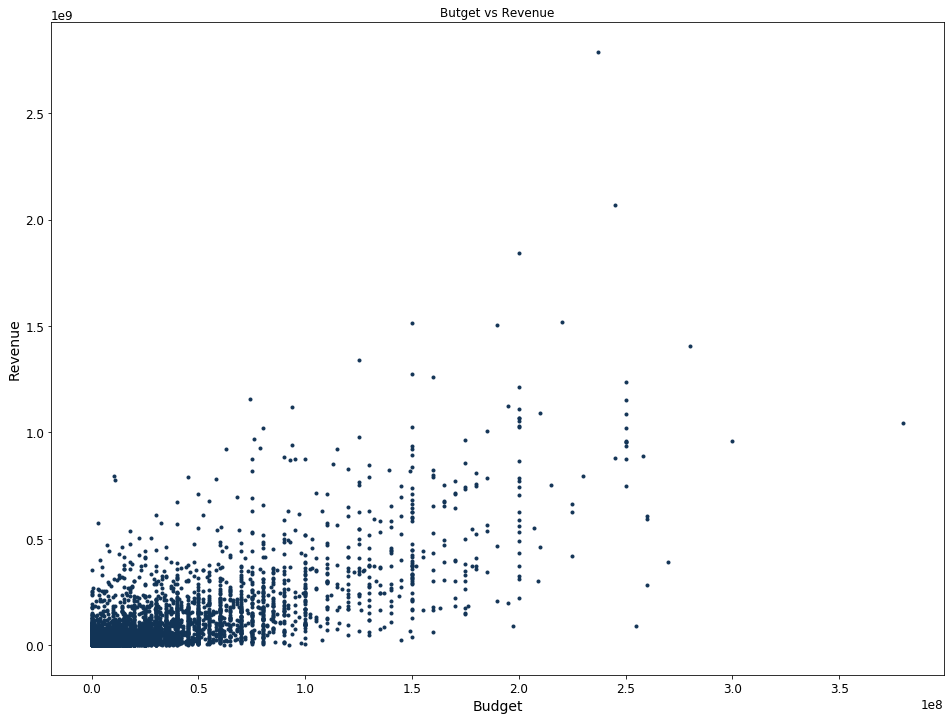

In [16]:
#Budget vs Revenue

meta_data['budget'] = pd.to_numeric(meta_data.budget, errors = 'coerce')


plt.plot(meta_data.budget, meta_data.revenue, '.', color ='#123456')
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Butget vs Revenue")

Text(0.5, 1.0, 'Genre and the revenue generated')

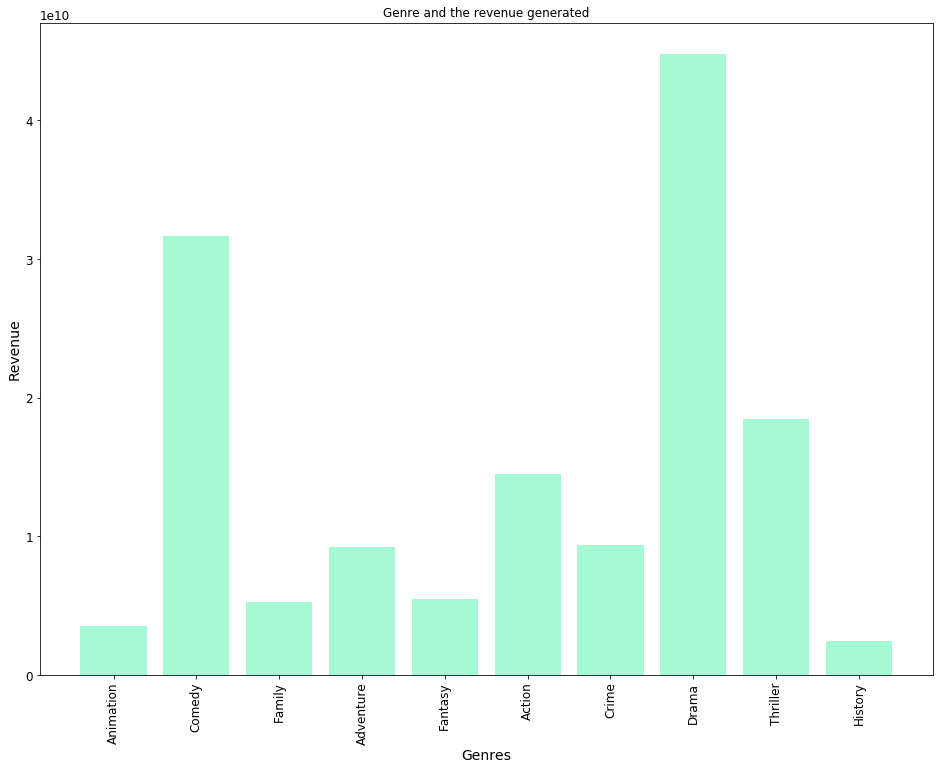

In [17]:
#Genres vs Revenue

genres_rev = dict()
genre_indx = -1
genre_list = list()
genre_revn = list()

for genre in meta_data.genres:
    genre_indx = genre_indx + 1
    try:
        if len(genre) != 0:
            for genr in genre:
                rev_genre =meta_data.revenue[genre_indx]/len(genre)
                genres_rev.setdefault(genr, []).append(round(rev_genre, 2))
    except:
        continue

for gen, rev in genres_rev.items():
    genre_list.append(gen)
    genre_revn.append(sum(rev))
    

plt_x = genre_list[:10]
x_genre = np.arange(len(plt_x))
plt_y = genre_revn[:10]


plt.bar(x_genre, plt_y, align ='center', alpha= 0.5, color = '#4df6aa')
plt.xticks(x_genre, plt_x, rotation = 90)
plt.xlabel("Genres")
plt.ylabel("Revenue")
plt.title("Genre and the revenue generated")

Text(0.5, 1.0, 'Popularity vs Revenue')

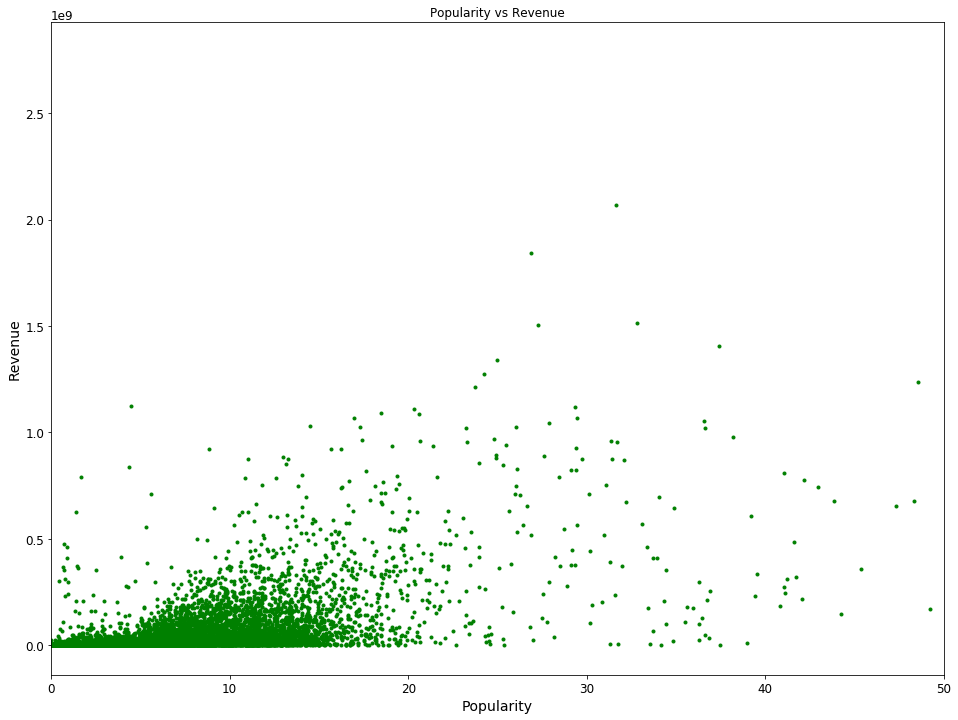

In [18]:
#Popularity vs Revenue

meta_data['popularity'] = pd.to_numeric(meta_data.popularity, errors = 'coerce')

plt.plot(meta_data.popularity, meta_data.revenue, 'g.')
plt.xlabel("Popularity")
plt.ylabel("Revenue")
plt.xlim(0,50)
plt.title("Popularity vs Revenue")

Text(0.5, 1.0, 'Company and the revenue generated')

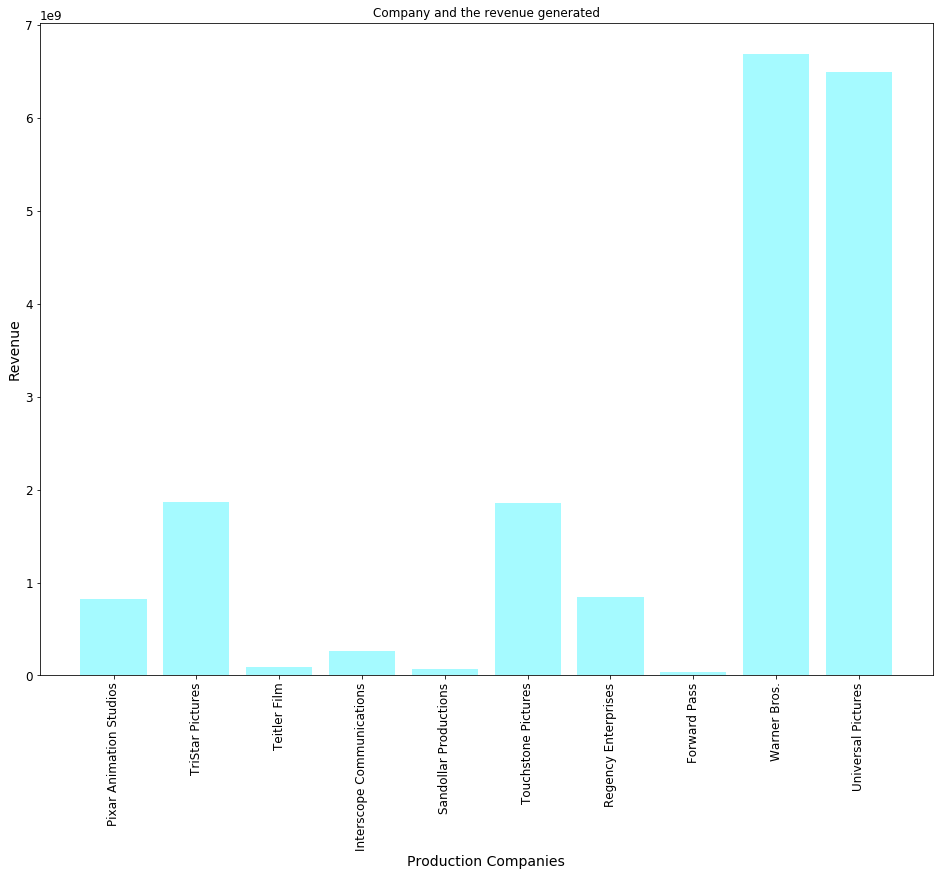

In [19]:
#Production company vs Revenue


comp_rev = dict()
comp_indx = -1
comp_list = list()
comp_revn = list()

for company in meta_data.production_companies:
    comp_indx = comp_indx + 1
    try:
        if len(company) != 0:
            for comp in company:
                rev_share =meta_data.revenue[comp_indx]/len(company)
                comp_rev.setdefault(comp, []).append(round(rev_share, 2))
    except:
        continue
        
for company, rev in comp_rev.items():
    comp_list.append(company)
    comp_revn.append(sum(rev))

plt_x = comp_list[:10]
x_comp = np.arange(len(plt_x))
plt_y = comp_revn[:10]


plt.bar(x_comp, plt_y, align ='center', alpha= 0.5, color = '#4df6ff')
plt.xticks(x_comp, plt_x, rotation = 90)
plt.xlabel("Production Companies")
plt.ylabel("Revenue")
plt.title("Company and the revenue generated")

Text(0.5, 1.0, 'Production country and the revenue generated')

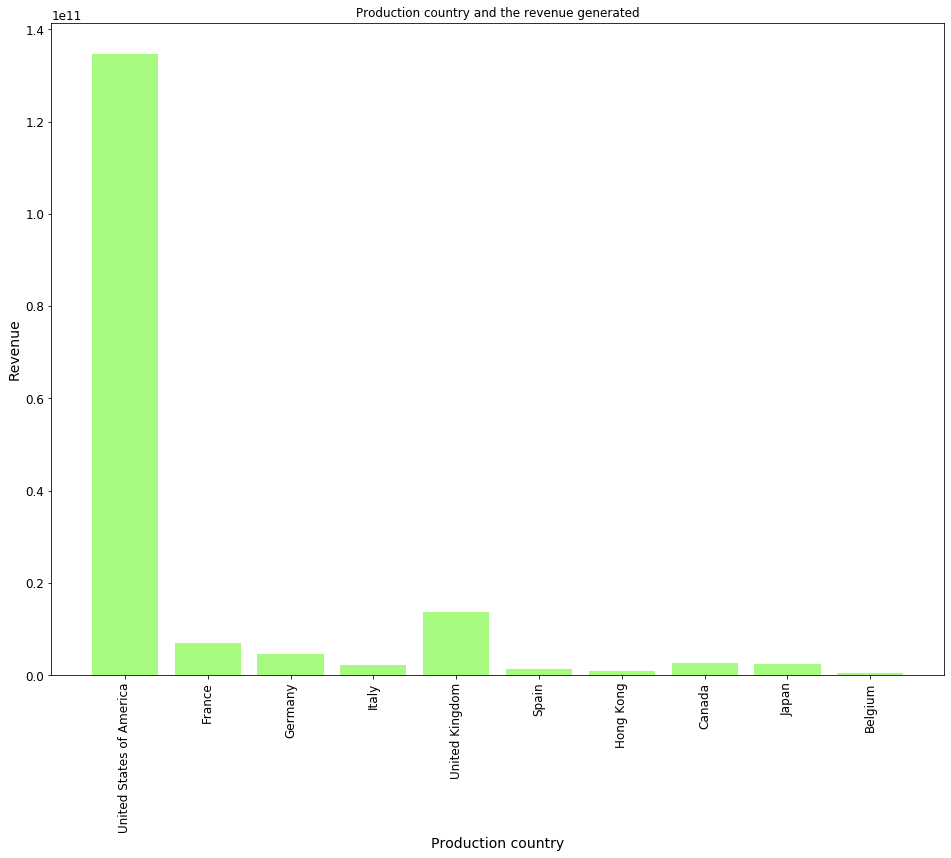

In [20]:
#Production country vs Revenue

country_rev = dict()
country_indx = -1
country_list = list()
country_revn = list()

for cntry in meta_data.production_countries:
    country_indx = country_indx + 1
    try:
        if len(cntry) != 0:
            for ctry in cntry:
                rev_cntry =meta_data.revenue[country_indx]/len(cntry)
                country_rev.setdefault(ctry, []).append(round(rev_cntry, 2))
    except:
        continue

for coutry, revn in country_rev.items():
    country_list.append(coutry)
    country_revn.append(sum(revn))

cnt_x = country_list[:10]
x_country = np.arange(len(cnt_x))
cnt_y = country_revn[:10]

plt.bar(x_country, cnt_y, align ='center', alpha= 0.5, color = '#4df600')
plt.xticks(x_country, cnt_x, rotation = 90)
plt.xlabel("Production country")
plt.ylabel("Revenue")
plt.title("Production country and the revenue generated")



Text(0.5, 1.0, 'Average votes vs Revenue')

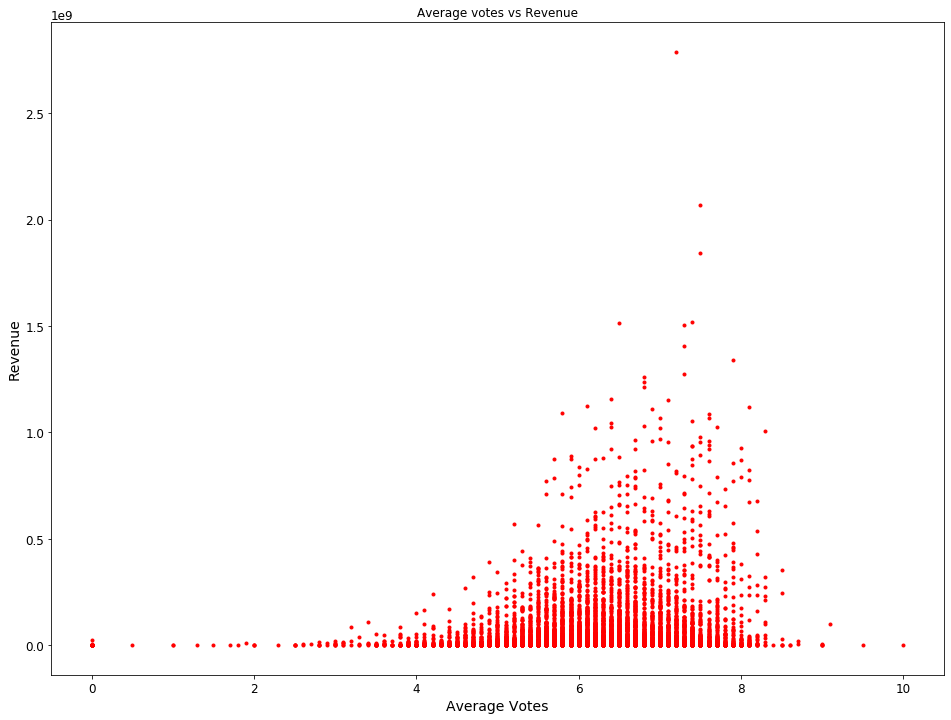

In [21]:
#Average votes vs Revenue

plt.plot(meta_data.vote_average, meta_data.revenue, 'r.')
plt.xlabel("Average Votes")
plt.ylabel("Revenue")
plt.title("Average votes vs Revenue")

Text(0.5, 1.0, 'Rating vs Revenue')

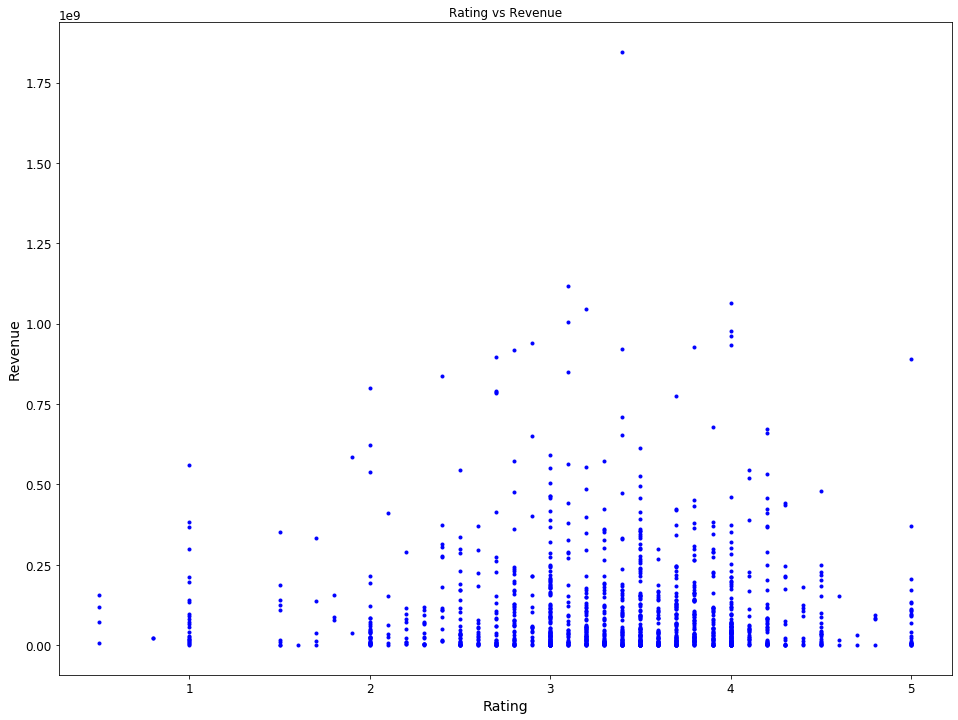

In [22]:
# Rating vs Revenue

ratings_id = ratings_small.movieId
ratings_rate = ratings_small.rating
rating_dict = dict()
avg_rating_dict = dict()
count = -1
rev_dict = dict()
rate_x = list()
revn_y = list()

for movieid in ratings_id:
    count = count + 1
    rating_dict.setdefault(movieid, []).append(ratings_rate[count])

for idval, ratelist in rating_dict.items():
    avg_rate = sum(ratelist)/len(ratelist)
    avg_rating_dict.setdefault(str(idval), round(avg_rate, 1))


for indx, row in meta_data.iterrows():
    rev_dict.update({row["id"]:row["revenue"]})



for ratid, rate in avg_rating_dict.items():
    for metid, revnu in rev_dict.items():
        if ratid == metid:
            rate_x.append(rate)
            revn_y.append(revnu)



plt.plot(rate_x, revn_y, 'b.')
plt.xlabel("Rating")
plt.ylabel("Revenue")
plt.title("Rating vs Revenue")

In [23]:
# Splitting data into training testing and validation

from sklearn.model_selection import train_test_split

y_movie = meta_data.revenue
x_movie = meta_data.drop('revenue', axis=1)
x_movie_train,x_movie_test,y_movie_train,y_movie_test=train_test_split(x_movie,y_movie,test_size=0.2)
x_movie_train,x_movie_val,y_movie_train,y_movie_val=train_test_split(x_movie_train,y_movie_train,test_size=0.1)

print("X training data shape: ", x_movie_train.shape)
print("Y training data shape: ", y_movie_train.shape)
print("X validation data shape: ", x_movie_val.shape)
print("Y validation data shape: ", y_movie_val.shape)
print("X test data shape: ", x_movie_test.shape)
print("Y test data shape: ", y_movie_test.shape)

X training data shape:  (5337, 8)
Y training data shape:  (5337,)
X validation data shape:  (594, 8)
Y validation data shape:  (594,)
X test data shape:  (1483, 8)
Y test data shape:  (1483,)
